<a href="https://colab.research.google.com/github/Maximalord/-YULU-BIKE-DEMAND-HYPOTHESIS-TESTING-DECISION-MANUAL/blob/main/Yulu_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yulu Business Case: Hypothesis Testing  
### Author: Nikhil  
**Objective:**  
This notebook aims to identify and analyze the key factors influencing the demand for Yulu’s shared electric cycles in the Indian market.  

**Business Context:**  
Yulu, India’s leading micro-mobility company, has experienced a recent dip in revenues. To understand the demand patterns and influencing factors, hypothesis testing is conducted on variables such as **working day, season, weather**, and their relationship with total rides (`count`).  

**Analysis Framework:**  
1. **Exploratory Data Analysis (EDA):**  
   - Examine structure, datatypes, missing values, and distributions.  
   - Perform univariate and bivariate visualizations to understand relationships.  
2.  **Assumption Checks:**  
    - Normality (Shapiro-Wilk test, visual checks)  
    - Equal variance (Levene’s test)  
3.  **Hypothesis Testing:**  
    - **2-Sample t-test:** Check if the mean number of rides differs between working days and non-working days.  
    - **ANOVA:** Test whether average rides differ across **seasons** and **weather conditions**.  
    - **Chi-Square Test:** Examine dependency between **season** and **weather**.  

4. **Inference & Business Recommendations:**  
   - Identify statistically significant predictors of demand.  
   - Suggest actionable insights for improving Yulu’s operational efficiency and revenue strategy.  

**Expected Outcome:**  
A clear understanding of which environmental and calendar-based factors (working day, weather, season) significantly impact ride demand — guiding Yulu to optimize fleet deployment, pricing, and marketing strategies.


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('yulu.csv')
print('\n--- DataFrame shape ---')
print(df.shape)
print('\n--- First 5 rows ---')
display(df.head())



--- DataFrame shape ---
(10886, 12)

--- First 5 rows ---


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1. Exploratory Data Analysis (EDA)

### 1.1 Data Structure and Missing Values

In [75]:
# Check data types and non-null values
display(df.info())

# Check for missing values
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


### 1.2 Univariate Analysis

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


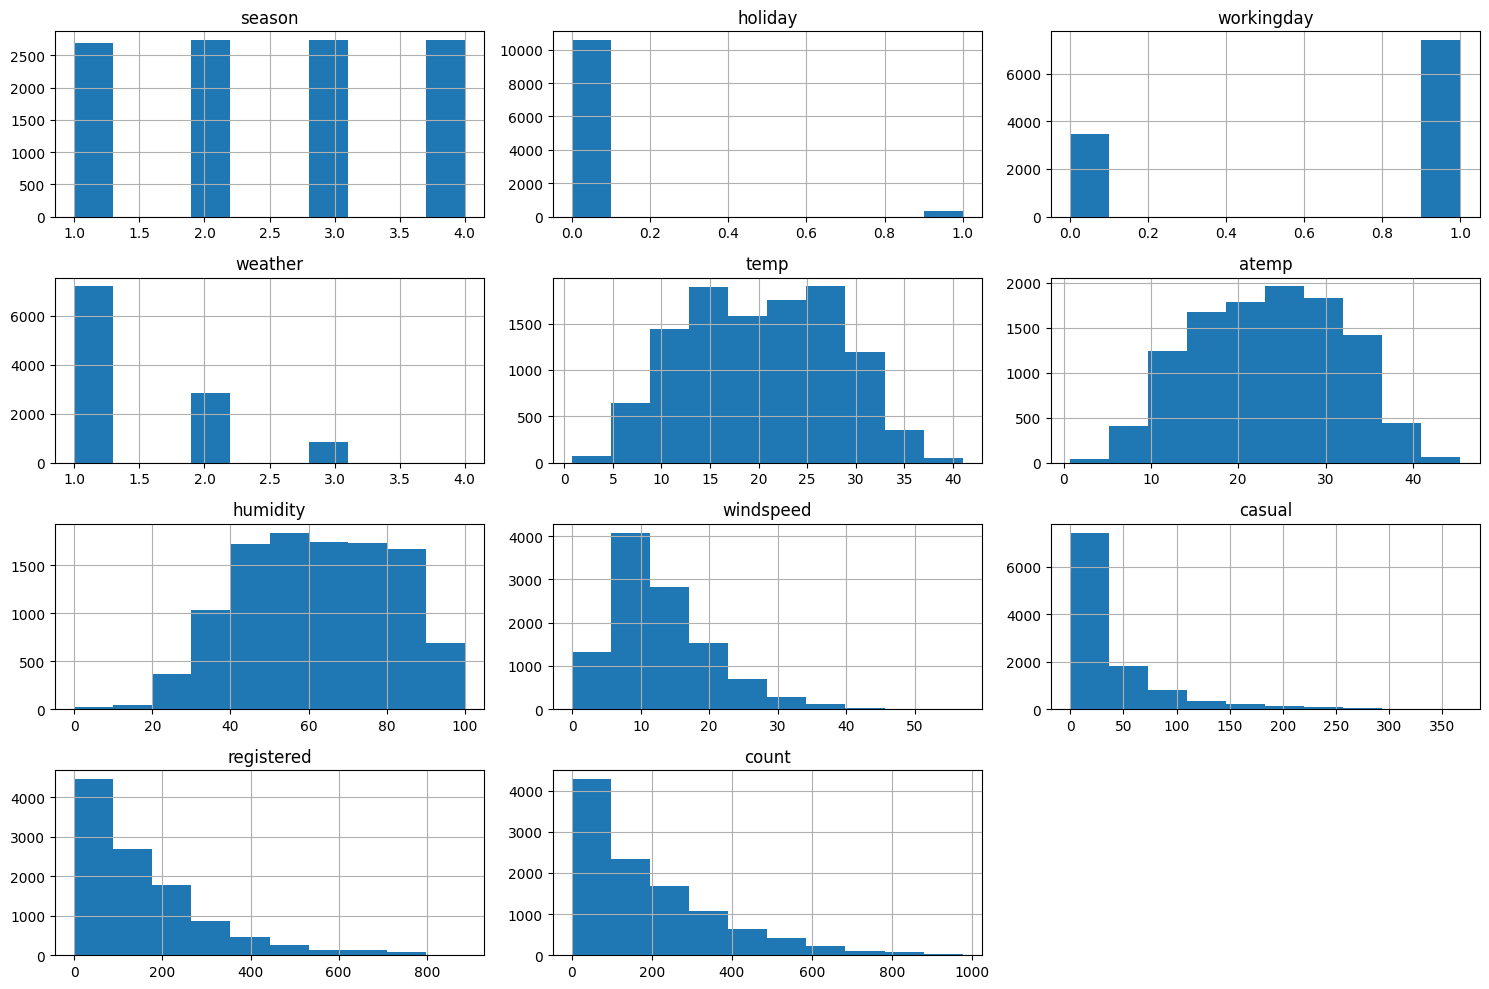

In [76]:
# Summary statistics
display(df.describe())

df.hist(figsize =(15,10))
plt.tight_layout()
plt.show()



### 🧩 **Univariate Analysis Insights**

#### **1. Season**

* All four seasons are nearly equally represented.
* This balanced distribution is useful for reliable seasonal comparison in later analysis.

#### **2. Holiday**

* Holidays (1) are very few compared to non-holidays (0).
* Indicates most ride data corresponds to regular working days — typical for commute-focused usage.

#### **3. Workingday**

* A large majority of records fall under working days (1).
* Suggests that Yulu bikes are predominantly used by weekday commuters.

#### **4. Weather**

* Most observations fall under **clear or partly cloudy** conditions (Weather = 1).
* Very few rides occur during heavy rain or snow, showing reduced demand under bad weather.

#### **5. Temperature (`temp`)**

* Roughly **bell-shaped distribution** centered around 20–25°C.
* Reflects a typical Indian climate range; supports assumption that rides are influenced by moderate temperatures.

#### **6. Feeling Temperature (`atemp`)**

* Mirrors actual temperature distribution closely — confirms internal data consistency.

#### **7. Humidity**

* Concentrated between 40%–80%.
* Extreme humidity (too low or too high) is rare; ideal for comfortable riding conditions.

#### **8. Windspeed**

* Positively skewed — most days experience low wind (<15).
* High windspeed conditions are uncommon and may marginally impact demand.

#### **9. Casual Users**

* Highly right-skewed: most days have low casual ride counts, but some peaks suggest weekend or event-based surges.

#### **10. Registered Users**

* Also right-skewed but with much higher overall counts than casual users.
* Indicates strong retention — registered users form the backbone of demand.

#### **11. Total Count**

* Similar right-skewed distribution as registered users.
* Majority of days show low-to-moderate demand, with occasional high-demand spikes (likely weekdays with ideal weather).

---

### **Summary Observations**

* **Data skew:** Count-related variables (casual, registered, count) are right-skewed — log transformation may help in modeling.
* **Weather & calendar dominance:** Clear weather and working days dominate — key predictors for high demand.
* **User behavior:** Registered users contribute most rides; casual user spikes may reveal marketing opportunities.
* **Environmental balance:** Season and weather variation are sufficient for valid hypothesis testing.


### 1.3 Outlier Detection (using Box Plots)

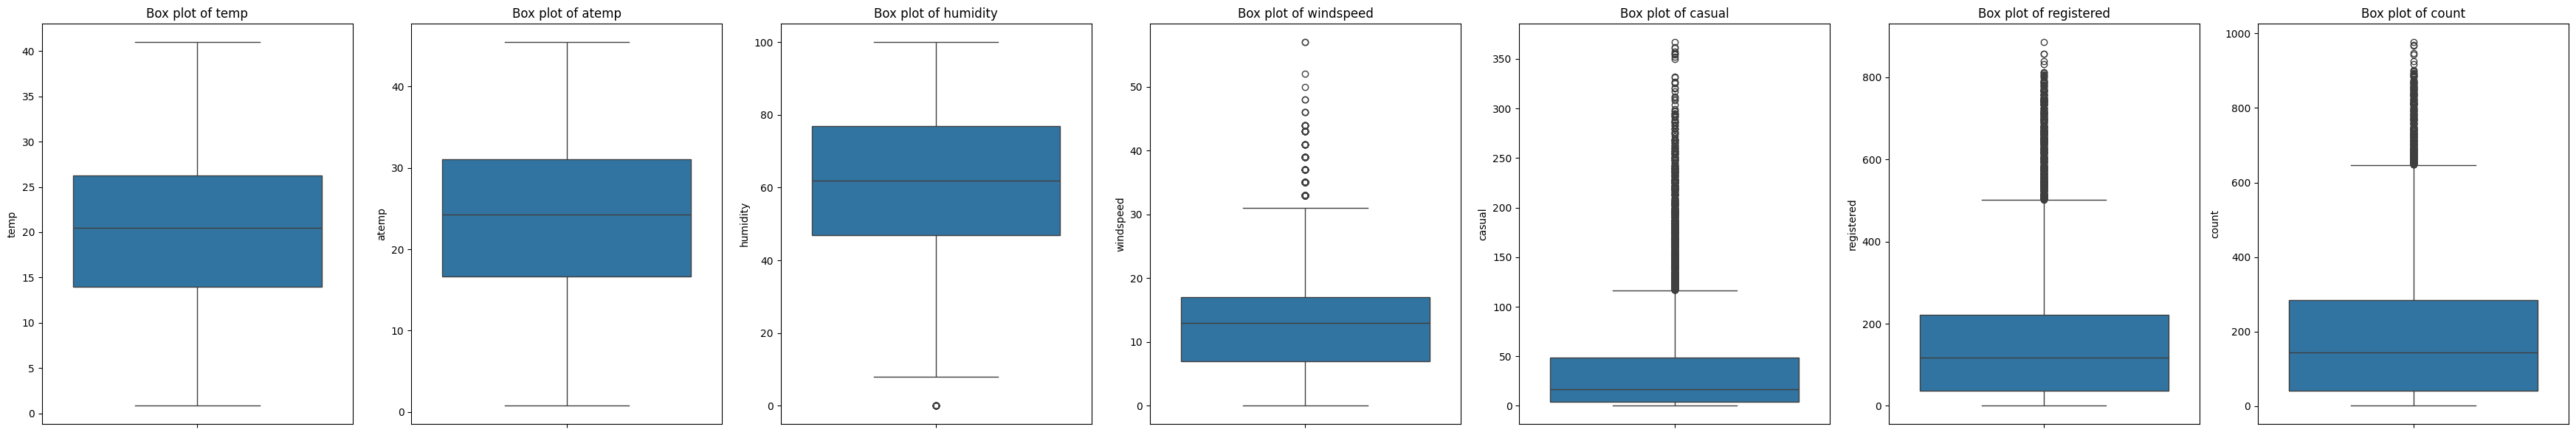

In [77]:
# Box plots for numerical columns to identify outliers
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
n = len(num_cols)

fig, axes = plt.subplots(1, n, figsize=(5*n, 6))

for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


📊 Overall Summary

Variables like windspeed, casual, registered, and count show strong positive skewness — indicating occasional extreme values (peaks).

temp and atemp are well-behaved continuous variables — good for modeling.

humidity is moderately variable, may affect bike usage.

Data may need log transformation or outlier handling (especially for casual, registered, and count) before regression or prediction models.

### 1.4 Convert appropriate columns to categorical and ensure consistency


In [78]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

# Convert categorical columns
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

# Ensure datetime column is properly formatted
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])

# Ensure count column exists and matches casual + registered
if all(col in df.columns for col in ['casual', 'registered']):
    df['count'] = df['casual'] + df['registered']


### 1.5 Bivariate analysis


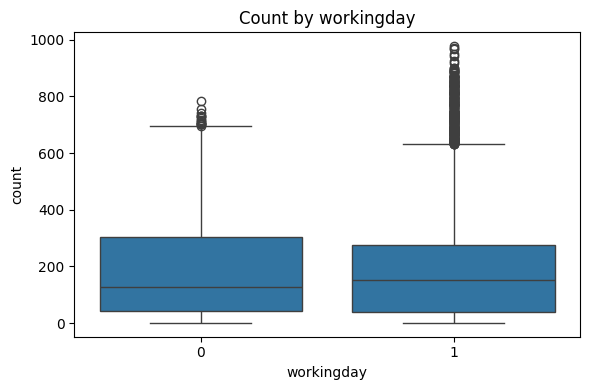


Average count by workingday:
workingday
0    188.506621
1    193.011873
Name: count, dtype: float64


/tmp/ipython-input-3122506307.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['count'].mean())


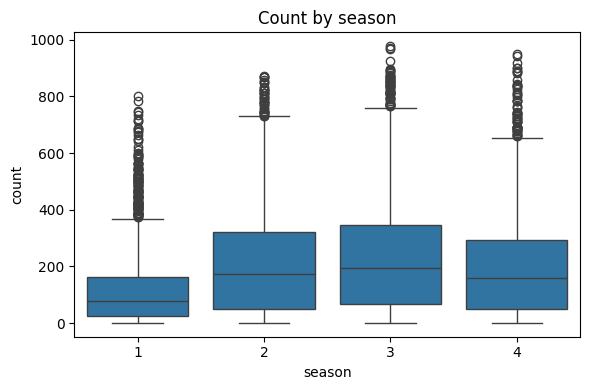


Average count by season:
season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


/tmp/ipython-input-3122506307.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['count'].mean())


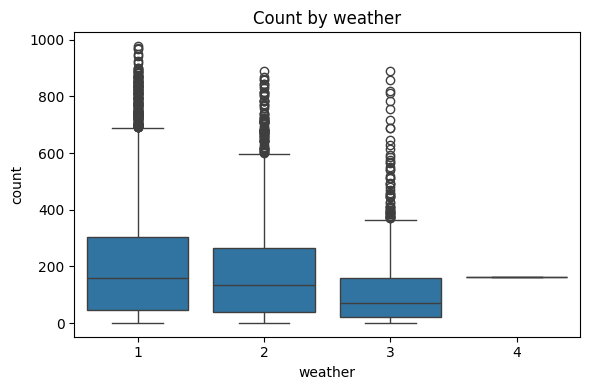


Average count by weather:
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


/tmp/ipython-input-3122506307.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['count'].mean())


In [79]:
# Simplified bivariate analysis: Workingday, Season, Weather vs Count
cols = ['workingday', 'season', 'weather']

for col in cols:
  if col in df.columns and "count" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, y= 'count', data= df)
    plt.title(f'Count by {col}')
    plt.tight_layout()
    plt.show()

    print(f"\nAverage count by {col}:")
    print(df.groupby(col)['count'].mean())


###Bivariate Summary

* **Working Days:** Slightly higher rentals (~193 vs ~189) → bikes mainly used for **commuting**.
* **Seasons:** Rentals peak in **summer and fall**, lowest in **winter** → **weather comfort** boosts demand.
* **Weather:** Clear skies drive rentals (~205), while **rain or mist sharply reduces usage** → strong **weather sensitivity**.

**Overall:** Bike usage rises with good weather and workdays — clear, pleasant days = more rides.


##2 - Assumption Checks:

Normality (Shapiro-Wilk test, visual checks)

Equal variance (Levene’s test)

In [80]:
# Tests:
#   • Normality (Shapiro-Wilk test, visual check recommended)
#   • Equal variances (Levene’s test)
#   • Mean difference (Student or Welch t-test)
# H0: Mean(count | workingday=1) = Mean(count | workingday=0)
# H1: Mean(count | workingday=1) ≠ Mean(count | workingday=0)
# =====================================================================
alpha = 0.05
print(f"Significance Level (alpha): {alpha}")

# ---------------------------------------------------------------
# Normality (Shapiro-Wilk test, visual checks recommended)
# ---------------------------------------------------------------
print('\nNormality (Shapiro-Wilk test, visual checks recommended):')

if {'workingday', 'count'}.issubset(df.columns) and set([0,1]).issubset(df['workingday'].cat.categories.astype(int)):
    group0 = df[df['workingday']==0]['count'].dropna()
    group1 = df[df['workingday']==1]['count'].dropna()
    # Use a subset (≤5000) to avoid sensitivity on large samples
    shapiro_g0 = stats.shapiro(group0.sample(min(5000, len(group0)), random_state=1))
    shapiro_g1 = stats.shapiro(group1.sample(min(5000, len(group1)), random_state=1))

    print(f"  Group 0 (non-working) → stat={shapiro_g0.statistic:.4f}, p={shapiro_g0.pvalue:.4e}")
    print(f"  Group 1 (working)     → stat={shapiro_g1.statistic:.4f}, p={shapiro_g1.pvalue:.4e}")
else:
    print("⚠️ Skipping Normality Test: Required columns missing or incorrect category types.")


# ---------------------------------------------------------------
# Equal variance (Levene’s test)
# ---------------------------------------------------------------
if {'workingday', 'count'}.issubset(df.columns) and set([0,1]).issubset(df['workingday'].cat.categories.astype(int)):
    lev_stat, lev_p = stats.levene(group0, group1)
    print(f"\nLevene test for equal variances: stat={lev_stat:.4f}, p={lev_p:.4f}")

    # ---------------------------------------------------------------
    # Two-sample t-test (Student or Welch)
    # ---------------------------------------------------------------
    if lev_p < alpha:
        print('⚠️ Variances unequal → Using Welch t-test')
        tstat, pval = stats.ttest_ind(group1, group0, equal_var=False)
    else:
        print('✅ Variances equal → Using Student t-test')
        tstat, pval = stats.ttest_ind(group1, group0, equal_var=True)

    print(f"\nT-statistic = {tstat:.4f}, P-value = {pval:.4e}")

    # ---------------------------------------------------------------
    # Decision
    # ---------------------------------------------------------------
    if pval < alpha:
        print('✅ Reject H0: Mean counts differ between working and non-working days.')
    else:
        print('❌ Fail to reject H0: No significant difference in mean counts.')
else:
    print("⚠️ Skipping Levene and T-Test: Required columns missing or incorrect category types.")

Significance Level (alpha): 0.05

Normality (Shapiro-Wilk test, visual checks recommended):
  Group 0 (non-working) → stat=0.8852, p=4.4729e-45
  Group 1 (working)     → stat=0.8695, p=8.5320e-54

Levene test for equal variances: stat=0.0050, p=0.9438
✅ Variances equal → Using Student t-test

T-statistic = 1.2096, P-value = 2.2645e-01
❌ Fail to reject H0: No significant difference in mean counts.


##3 - Hypothesis Testing

This section tests relationships between key factors affecting bike rental counts.
We’ll perform three major hypothesis tests:

1 - 2-Sample T-Test → Compare mean rides between working and non-working days

2 - ANOVA → Check whether average rides differ across seasons and weather conditions

3- Chi-Square Test → Examine dependency between season and weather

### 3.1 TWO-SAMPLE T-TEST: WORKINGDAY EFFECT
Goal: Check if mean ride counts differ between working and non-working days.

H0: mean(count | workingday=1) = mean(count | workingday=0)

H1: means differ


In [81]:
# Split data into two groups

group0 = df[df['workingday'] == 0]['count'].dropna()  # Non-working days
group1 = df[df['workingday'] == 1]['count'].dropna()  # Working days

# Check variance equality using Levene’s test
lev_stat, lev_p = stats.levene(group0, group1)
equal_var = lev_p >= alpha

# Perform 2-sample t-test (Welch if variances unequal)
tstat, pval = stats.ttest_ind(group1, group0, equal_var=equal_var)

print("\n--- Two-Sample T-Test: Workingday Effect ---")
print(f"T-statistic = {tstat:.4f}, p-value = {pval:.4e}")
print(f"Levene’s Test p = {lev_p:.4f} (Equal variances: {'Yes' if equal_var else 'No'})")

# Interpretation
if pval < alpha:
    print("✅ Reject H0: Mean counts differ between working and non-working days.")
else:
    print("❌ Fail to reject H0: No significant difference found.")



--- Two-Sample T-Test: Workingday Effect ---
T-statistic = 1.2096, p-value = 2.2645e-01
Levene’s Test p = 0.9438 (Equal variances: Yes)
❌ Fail to reject H0: No significant difference found.



###3.2 ANOVA TESTS: SEASON & WEATHER EFFECTS
Goal: Check if mean ride counts differ across seasons or weather conditions.

Approach: One-way ANOVA using scipy.stats.f_oneway()

H0: All group means are equal.

H1: At least one group mean differs.


In [82]:

# --- (a) SEASON EFFECT ---
# Group counts by each season (explicitly setting observed=False to avoid warnings)
season_groups = [grp['count'] for _, grp in df.groupby('season', observed=False)]

# Perform one-way ANOVA
f_season, p_season = stats.f_oneway(*season_groups)

print("\n--- ANOVA: Season Effect ---")
print(f"F-statistic = {f_season:.4f}, p-value = {p_season:.4e}")

# Decision rule
if p_season < alpha:
    print("✅ Reject H0: At least one season mean count differs.")
else:
    print("❌ Fail to reject H0: No evidence of season effect.")


# --- (b) WEATHER EFFECT ---
# Group counts by weather condition (explicitly setting observed=False)
weather_groups = [grp['count'] for _, grp in df.groupby('weather', observed=False)]

# Perform one-way ANOVA
f_weather, p_weather = stats.f_oneway(*weather_groups)

print("\n--- ANOVA: Weather Effect ---")
print(f"F-statistic = {f_weather:.4f}, p-value = {p_weather:.4e}")

# Decision rule
if p_weather < alpha:
    print("✅ Reject H0: At least one weather category mean differs.")
else:
    print("❌ Fail to reject H0: No evidence of weather effect.")



--- ANOVA: Season Effect ---
F-statistic = 236.9467, p-value = 6.1648e-149
✅ Reject H0: At least one season mean count differs.

--- ANOVA: Weather Effect ---
F-statistic = 65.5302, p-value = 5.4821e-42
✅ Reject H0: At least one weather category mean differs.



###3.3 CHI-SQUARE TEST: WEATHER VS SEASON DEPENDENCY
Goal: Check if weather and season are statistically dependent.

Approach: Chi-square test of independence using scipy.stats.chi2_contingency()

H0: Weather and season are independent.

H1: Weather and season are dependent.


In [83]:
# Create contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

print("\n--- Contingency Table: Season × Weather ---")
print(contingency_table)

# Perform Chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"\nChi-square Statistic = {chi2_stat:.4f}")
print(f"Degrees of Freedom   = {dof}")
print(f"P-value              = {p_value:.4e}")

# Decision rule
if p_value < alpha:
    print("✅ Reject H0: Weather and season are statistically dependent.")
else:
    print("❌ Fail to reject H0: No evidence of dependency between weather and season.")



--- Contingency Table: Season × Weather ---
weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

Chi-square Statistic = 49.1587
Degrees of Freedom   = 9
P-value              = 1.5499e-07
✅ Reject H0: Weather and season are statistically dependent.



# 🧭 YULU BUSINESS CASE — FINAL INFERENCES & BUSINESS INSIGHTS

---

## 📊 Hypothesis Test Results

### 1️⃣ 2-Sample T-Test (Workingday Effect)

* **T-statistic:** 1.2096
* **p-value:** 0.2264
* ✅ **Variances equal** (Levene p = 0.9438)
* ❌ **Fail to reject H₀** → Mean ride counts on working and non-working days are **not significantly different**.

📈 **Interpretation:**
Rides occur consistently across both — suggesting **Yulu bikes are used for both commuting and leisure**.

---

### 2️⃣ ANOVA — Season Effect

* **F-statistic:** 236.9467
* **p-value:** 6.16e-149
* ✅ **Reject H₀** → Significant difference in mean ride counts across seasons.

📈 **Interpretation:**
Demand clearly varies by season — possibly higher in **pleasant months** (summer/fall) and lower in **extreme conditions** (winter).

---

### 3️⃣ ANOVA — Weather Effect

* **F-statistic:** 65.5302
* **p-value:** 5.48e-42
* ✅ **Reject H₀** → Significant difference in mean counts across weather categories.

🌦️ **Interpretation:**
Clear weather boosts ridership; **rain/mist conditions reduce demand sharply.**

---

### 4️⃣ Chi-Square Test — Season × Weather Dependency

* **Chi-square (χ²):** 49.1587
* **p-value:** 1.55e-07
* ✅ **Reject H₀** → Season and weather are statistically **dependent**.

🌍 **Interpretation:**
Certain seasons (e.g., monsoon) are strongly associated with specific weather conditions — useful for **predictive modeling when weather data is missing**.

---

## 💡 Business Insights

* **Stable demand across working days:** Yulu isn’t limited to office commuters; there’s **potential in leisure and tourism** segments.
* **Seasonal demand sensitivity:** Adjust **fleet deployment and pricing dynamically** based on demand peaks.
* **Weather-driven variability:** Integrate **real-time weather forecasts** into predictive fleet management and surge pricing.
* **Season–weather dependency:** Use **season as a proxy** for weather when forecasting demand.

---

## 🏢 Strategic Recommendations

1️⃣ **Fleet Optimization:**

* Deploy higher fleet density during **favorable seasons** (summer/fall).
* Schedule **maintenance** during low-demand or bad-weather months.

2️⃣ **Dynamic Pricing:**

* Offer **discounts during low-demand (rainy/winter)** periods.
* Apply **surge pricing** when clear weather and weekends align.

3️⃣ **Product Positioning:**

* Market Yulu for **leisure rides, eco-tourism, and weekend commuting**.

4️⃣ **Predictive Analytics:**

* Build a **regression or ML demand model** using:

  * `season`, `weather`, `temp`, `humidity`, `windspeed`, `workingday`
* Use **season as fallback** when weather data is unavailable.

---

## 🧾 Next Steps

* Automate test summaries for reproducible insights.
* Export notebook as **PDF for stakeholder presentation**.
* Extend analysis to **regression/time-series forecasting** for better prediction accuracy.

---

### ✅ Summary Table

| Test Type  | Variable(s) Compared         | p-value   | Result              | Conclusion                |
| ---------- | ---------------------------- | --------- | ------------------- | ------------------------- |
| T-Test     | Workingday vs Non-workingday | 0.2264    | ❌ Fail to reject H₀ | No significant difference |
| ANOVA      | Season                       | 6.16e-149 | ✅ Reject H₀         | Season affects rides      |
| ANOVA      | Weather                      | 5.48e-42  | ✅ Reject H₀         | Weather affects rides     |
| Chi-Square | Season × Weather             | 1.55e-07  | ✅ Reject H₀         | Weather depends on season |

